# LSHTM Reff comparisons

Here I compare the LSHTM Reff estimates produced by Price et al at different time points.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-poster')
from datetime import datetime as dt
from Reff_functions import *
from Reff_constants import *

In [50]:
df_R_old = read_in_Reff()
    
df_L_R = read_in_LSHTM()
df_cases = read_in_cases(case_file_date='28Jul')

In [51]:
df_L_R

,Unnamed: 0,type,date,bottom,top,lower,upper,median,mean,std,prob_control,mean_window,sd_window,confidence,date_onset,state,date_of_analysis
0,0,nowcast,2020-02-14,0.153051,2.334309,0.153051,0.404229,0.387671,0.974066,1.300986,0.700000,3.000000,1.025978,1.000000,2020-02-19,WA,2020-07-27
1,1,nowcast,2020-02-15,0.039381,2.095030,0.010038,0.458491,0.448248,0.696445,0.680216,0.733333,4.000000,1.660910,1.000000,2020-02-20,WA,2020-07-27
2,2,nowcast,2020-02-16,0.059741,2.203382,0.398748,1.021683,0.667627,0.795015,0.687228,0.733333,4.000000,1.660910,1.000000,2020-02-21,WA,2020-07-27
3,3,nowcast,2020-02-17,0.062429,3.123954,0.062429,0.741194,0.704504,1.235300,1.412852,0.600000,3.833333,1.355049,1.000000,2020-02-22,WA,2020-07-27
4,4,nowcast,2020-02-18,0.089700,4.741885,0.156969,1.420340,1.323398,1.959231,2.030840,0.412500,3.875000,1.545717,1.000000,2020-02-23,WA,2020-07-27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3285,2254,nowcast,2020-07-03,0.335155,1.032422,0.484713,0.752499,0.641686,0.673346,0.222352,0.913413,1.947948,1.541398,0.777736,2020-07-08,NSW,2020-07-16
3286,2255,nowcast,2020-07-04,0.377372,1.132724,0.526637,0.821673,0.720021,0.753190,0.239839,0.850050,1.947948,1.541398,0.721748,2020-07-09,NSW,2020-07-16
3287,2256,nowcast,2020-07-05,0.434843,1.292793,0.585349,0.926001,0.829955,0.871006,0.276024,0.716416,1.947948,1.541398,0.653490,2020-07-10,NSW,2020-07-16
3288,2257,nowcast,2020-07-06,0.526545,1.578843,0.691363,1.096180,0.985870,1.041906,0.339545,0.517618,1.947948,1.541398,0.571331,2020-07-11,NSW,2020-07-16


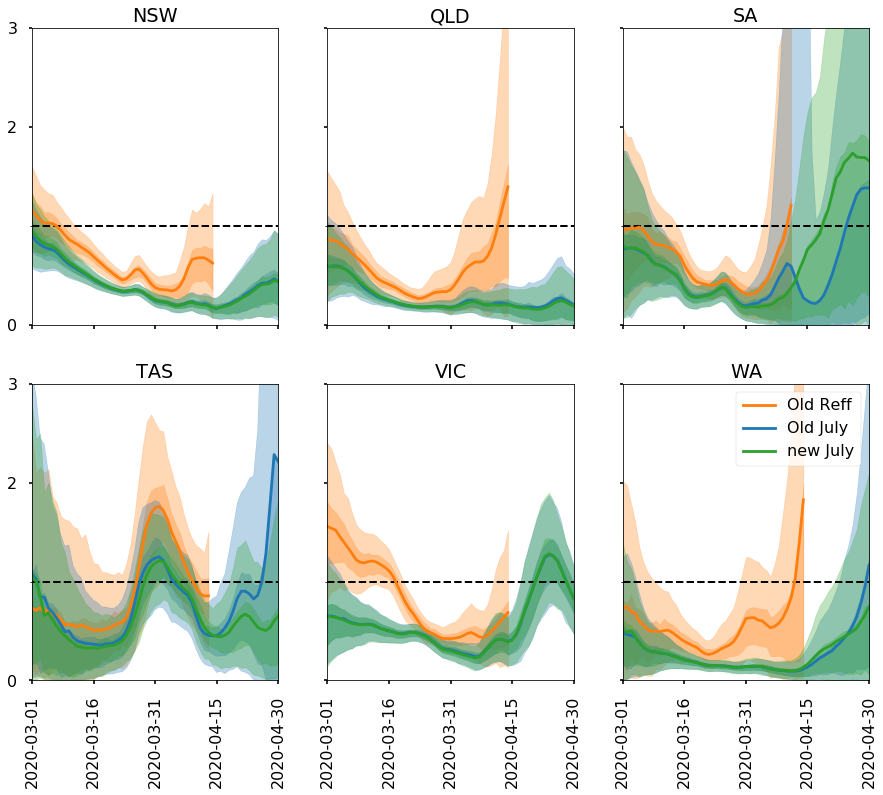

In [52]:
#plot each estimate
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-30')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_R_old.loc[(df_R_old.state==state) & (df_R_old.date.isin(date_filter))]
    
    df_april = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-16')&(df_L_R.state==state)]
    df_april = df_april.loc[df_april.date.isin(date_filter)]
    
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
    df_june = df_june.loc[(df_june.date.isin(date_filter))]
    
    plot_dfs ={
        'Old Reff':df_state,
        'Old July': df_april,
        'new July':df_june,
    }
    colors = {
        'Old Reff':'C1',
        'Old July': 'C0',
        'new July':'C2',
        
    }
    
    for label, df in plot_dfs.items():
        #plot old estimate
        ax[row,col].plot(df.date, df['median'], label=label,color=colors[label])
        ax[row,col].fill_between(df.date, df['bottom'], df['top'],color=colors[label], alpha=0.3)
        ax[row,col].fill_between(df.date, df['lower'], df['upper'],color=colors[label], alpha=0.3)


    
    
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    ax[row,col].xaxis.set_major_locator(plt.MaxNLocator(4))
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
    
plt.legend()
plt.show()

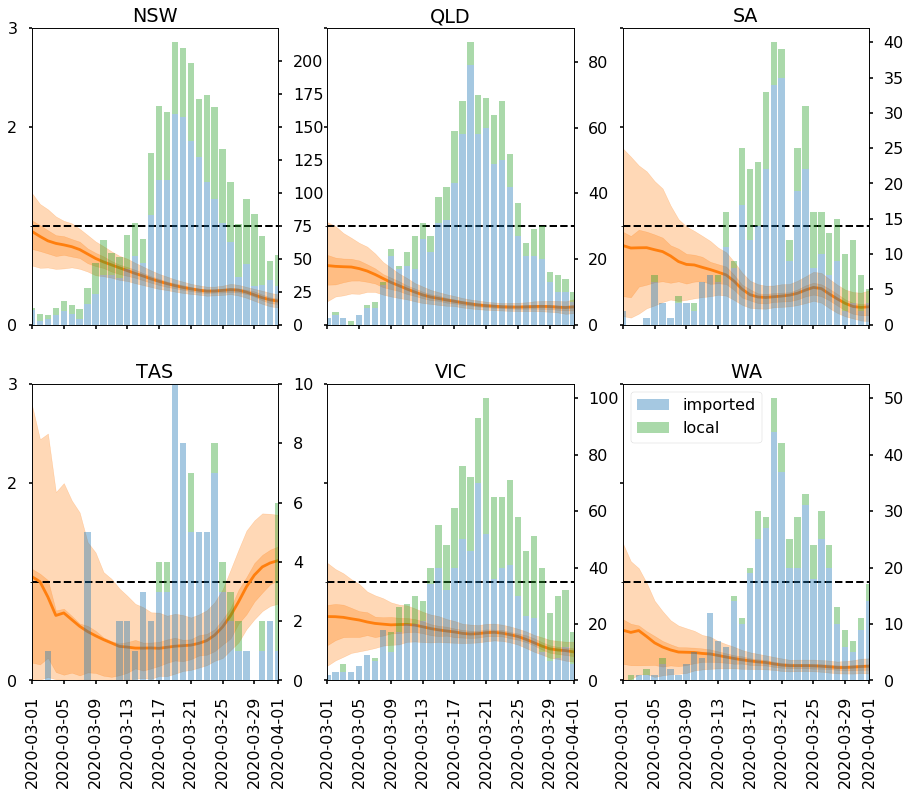

In [53]:
## plot cases over the top of Reff
fig, ax = plt.subplots(figsize=(15,12), ncols=3,nrows=2, sharex=True, sharey=True)

states = [initial[1] for initial in sorted(list(states_initials.items()))]

states.remove('NT')
states.remove('ACT')
date_filter = pd.date_range(start='2020-03-01',end='2020-04-01')
    
for i, state in enumerate(states):
    
    row, col = i//3, i%3
    
    #filters
    df_state = df_cases.loc[(state)]

    df_state = df_state.loc[date_filter[0]:date_filter[-1]]
    #print(df_state.index)
    #df_state.index = pd.DatetimeIndex(df_state.index)
    
    #fill missing dates
#
    #df_state.index = df_state.reindex(date_filter, fill_value=0)
    df_state= df_state.asfreq('D')
    df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
    df = df_june.loc[(df_june.date.isin(date_filter))]
    

    #plot new estimate
    ax[row,col].plot(df.date, df['median'], label='June Reff',color='C1')
    ax[row,col].fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
    ax[row,col].fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
    ax2 = ax[row,col].twinx()
    ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4, label='imported')
    ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4, label='local')
    #formatting
    ax[row,col].set_title(state)

    
    #grid line at R_eff =1
    ax[i//3,i%3].set_yticks([1],minor=True,)
    ax[i//3,i%3].set_yticks([0,2,3],minor=False)
    ax[i//3,i%3].set_yticklabels([0,2,3],minor=False)
    ax[i//3,i%3].yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
    ax[i//3,i%3].set_ylim((0,3))
    
        
    if i//3==1:
        ax[i//3,i%3].tick_params(axis='x',rotation=90)
        ax[row,col].set_xlim((date_filter[0],date_filter[-1]))
plt.legend()
plt.show()

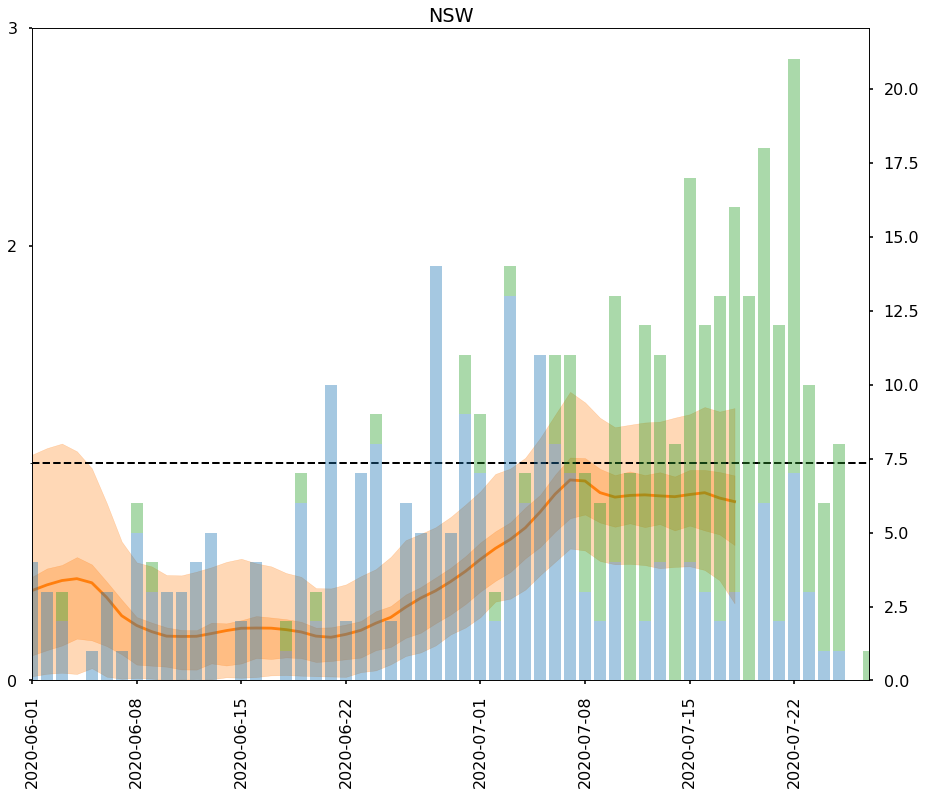

In [54]:
fig, ax = plt.subplots(figsize=(15,12))

date_filter = pd.date_range(start='2020-06-01',end='2020-07-27')
    
state = 'NSW'


#filters
df_state = df_cases.loc[(state)]

df_state = df_state.loc[date_filter[0]:date_filter[-1]]
#print(df_state.index)
#df_state.index = pd.DatetimeIndex(df_state.index)

#fill missing dates
#
#df_state.index = df_state.reindex(date_filter, fill_value=0)
df_state= df_state.asfreq('D')
df_june = df_L_R.loc[(df_L_R.date_of_analysis=='2020-07-27')&(df_L_R.state==state)]
df = df_june.loc[(df_june.date.isin(date_filter))]


#plot new estimate
ax.plot(df.date, df['median'], label='July Reff',color='C1')
ax.fill_between(df.date, df['bottom'], df['top'],color='C1', alpha=0.3)
ax.fill_between(df.date, df['lower'], df['upper'],color='C1', alpha=0.3)
ax2 = ax.twinx()
ax2.bar(df_state.index, df_state.imported,color='C0',alpha=0.4)
ax2.bar(df_state.index, df_state.local,bottom=df_state.imported,color='C2',alpha=0.4)
#formatting
ax.set_title(state)


#grid line at R_eff =1
ax.set_yticks([1],minor=True,)
ax.set_yticks([0,2,3],minor=False)
ax.set_yticklabels([0,2,3],minor=False)
ax.yaxis.grid(which='minor',linestyle='--',color='black',linewidth=2)
ax.set_ylim((0,3))
    
        

ax.tick_params(axis='x',rotation=90)
ax.set_xlim((date_filter[0],date_filter[-1]))
    
plt.show()

# Time distributions


Generation time: 
Mean: 3.525066.2
Variance: 2.531956.2
Symptom Onset: 
Mean: 2.983543.2
Variance: 1.977833.2
Mean: 0.541523.2
Variance: 4.450984.2
The 40 pc quantile of the TG - TS is 0.06


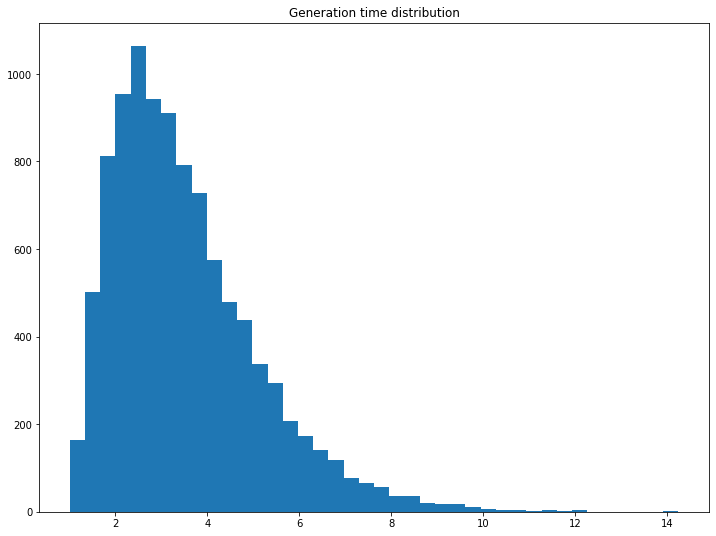

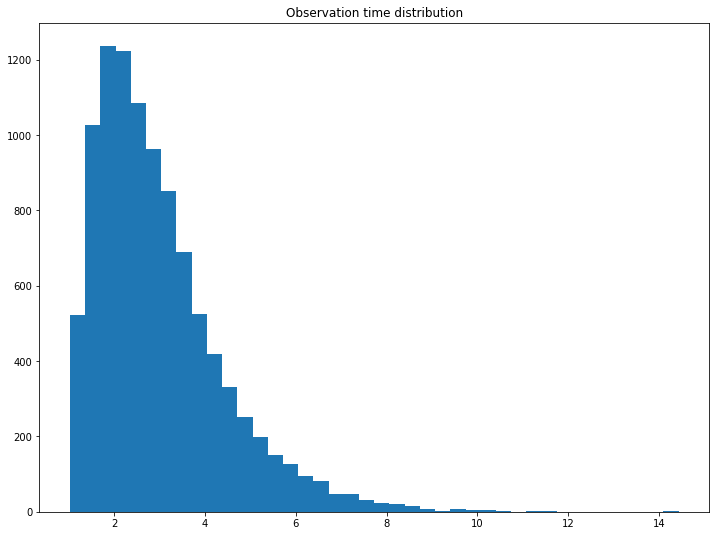

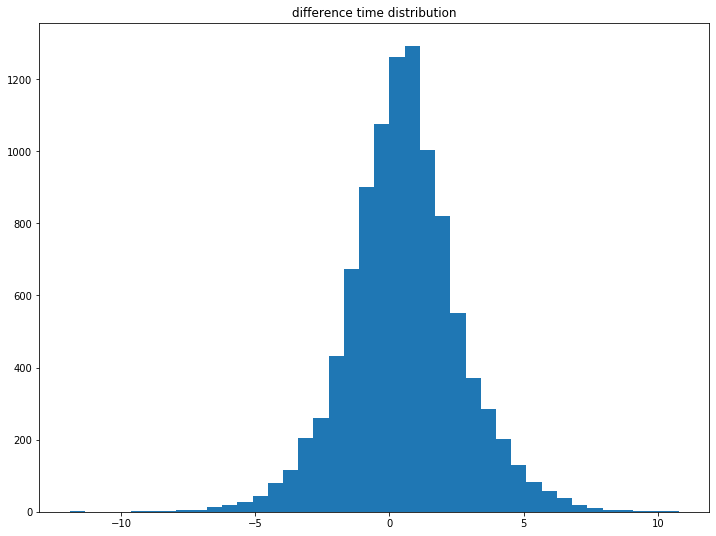

In [25]:
import numpy as np
import matplotlib.pyplot as plt

#Generation time distribution
fig,ax = plt.subplots(figsize=(12,9))
x = 1+np.random.gamma(2.5/1, 1, size = 10000)
print("Generation time: \nMean: %f.2" %np.mean(x))
print("Variance: %f.2" %np.var(x))
ax.hist(x,bins=40)
ax.set_title("Generation time distribution")

#Symptom onset time distribution
fig,ax = plt.subplots(figsize=(12,9))
y = 1+np.random.gamma(2/1, 1, size = 10000)
print("Symptom Onset: \nMean: %f.2" %np.mean(y))
print("Variance: %f.2" %np.var(y))
ax.hist(y,bins=40)
ax.set_title("Observation time distribution")


#difference 
fig,ax = plt.subplots(figsize=(12,9))

print("Mean: %f.2" %np.mean(x-y))
print("Variance: %f.2" %np.var(x-y))
ax.hist(x-y,bins=40)
ax.set_title("difference time distribution")
print("The 40 pc quantile of the TG - TS is %.2f" % np.quantile(x-y,0.4))
plt.show()

Serial Interval from LSHTM: 
Mean: 4.654269.2
Std: 2.875617.2
Serial Interval from model: 
Mean: 3.536310.2
Std: 2.522473.2


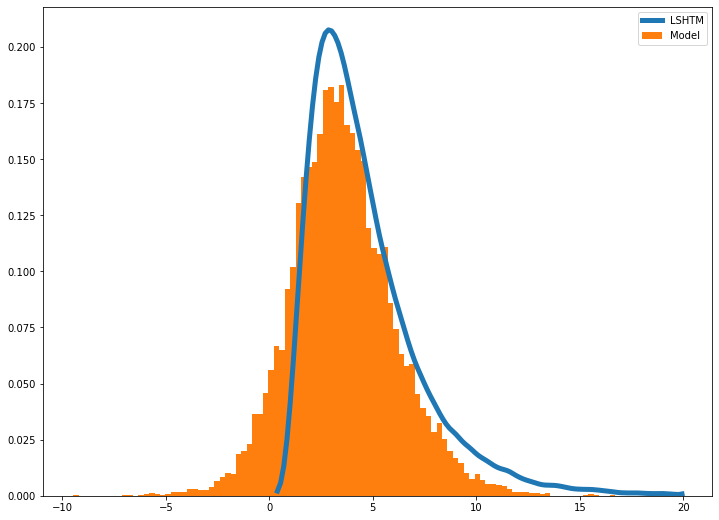

In [32]:
#LSHTM serial interval, see https://github.com/aakhmetz/COVID19SerialInterval
import seaborn as sns
fig,ax = plt.subplots(figsize=(12,9))
l = np.random.lognormal(1.376, 0.567, size=100000)
print("Serial Interval from LSHTM: \nMean: %f.2" %np.mean(l))
print("Std: %f.2" %np.sqrt(np.var(l)))

##compare to my own serial interval, where my SI = ts2 + tI2 - ts1,
#assuming person 1 infected at time tI1 = 0

ts1 = y #reuse previous distribution
ts2 = 1+np.random.gamma(2/1, 1, size = 10000) #resample symptoms
ti2 = x

SI = ts2 + ti2 - ts1

print("Serial Interval from model: \nMean: %f.2" %np.mean(SI))
print("Std: %f.2" %np.sqrt(np.var(SI)))

sns.kdeplot(l,cut=0,ax=ax, label='LSHTM', clip=(0,20),linewidth=5)
ax.hist(SI,bins=100, label='Model', density=True)
plt.legend()
plt.show()

In [ ]:
#Neg Binomial offspring distribution

n = 3
p = 1- Reff/(Reff+k)
fig,ax = plt.subplots(figsize=(12,9))
rv = nbinom(n, p)
x = np.arange(nbinom.ppf(0.01, n, p),
          nbinom.ppf(0.99, n, p))
ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1,
     label='frozen pmf')

print("Mean: %f.2" % nbinom.stats(n,p)[0])
print("Variance: %f.2" %nbinom.stats(n,p)[1])

ax.set_title("Offspring distribution")
plt.show()